## Load the data and check it looks right

In [1]:
import pandas as pd

In [2]:
#load the annotations csv file
mydat = pd.read_csv('./allobjstestset6/dataset.csv')

#only load images that had annotations
mydat = mydat[mydat.region_count  != 0]

In [3]:
#analyze the data to make sure it looks right
display(mydat)
print(len(mydat))

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
7,frame000000000111.jpg,38262,"{""caption"":"""",""public_domain"":""no"",""image_url""...",3,0,"{""name"":""circle"",""cx"":319,""cy"":138,""r"":24.546}","{""name"":""ball""}"
8,frame000000000111.jpg,38262,"{""caption"":"""",""public_domain"":""no"",""image_url""...",3,1,"{""name"":""polyline"",""all_points_x"":[297,297,301...","{""name"":""car""}"
9,frame000000000111.jpg,38262,"{""caption"":"""",""public_domain"":""no"",""image_url""...",3,2,"{""name"":""polyline"",""all_points_x"":[391,390,391...","{""name"":""goal""}"
10,frame000000001000.jpg,42299,"{""caption"":"""",""public_domain"":""no"",""image_url""...",3,0,"{""name"":""circle"",""cx"":321,""cy"":172,""r"":9.552}","{""name"":""ball""}"
11,frame000000001000.jpg,42299,"{""caption"":"""",""public_domain"":""no"",""image_url""...",3,1,"{""name"":""polyline"",""all_points_x"":[267,278,285...","{""name"":""car""}"
12,frame000000001000.jpg,42299,"{""caption"":"""",""public_domain"":""no"",""image_url""...",3,2,"{""name"":""polyline"",""all_points_x"":[383,383,384...","{""name"":""goal""}"
18,frame000000001110.jpg,38075,"{""caption"":"""",""public_domain"":""no"",""image_url""...",3,0,"{""name"":""circle"",""cx"":177,""cy"":166,""r"":6.576}","{""name"":""ball""}"
19,frame000000001110.jpg,38075,"{""caption"":"""",""public_domain"":""no"",""image_url""...",3,1,"{""name"":""polyline"",""all_points_x"":[297,297,305...","{""name"":""car""}"
20,frame000000001110.jpg,38075,"{""caption"":"""",""public_domain"":""no"",""image_url""...",3,2,"{""name"":""polyline"",""all_points_x"":[284,284,284...","{""name"":""goal""}"
26,frame000000010100.jpg,46246,"{""caption"":"""",""public_domain"":""no"",""image_url""...",3,0,"{""name"":""circle"",""cx"":328,""cy"":184,""r"":7.433}","{""name"":""ball""}"


33


## Organize the data and then convert into a dictionary for easier access:

In [4]:

import numpy as np

files_labels_dict = {}


#get the filenames
filenames = np.array(mydat['filename'])
#get the regions such as circle or a poly line
regions = np.array(mydat['region_shape_attributes'])
#get the labels e.g. ball, car, goal
obj_labels = np.array(mydat['region_attributes'])

#make sure the lengths match up
print("same length?", len(filenames)==len(regions) and len(regions) == len(obj_labels))

same length? True


In [7]:
import json 

#the following creates a dictionary with filename as key
#and the annotated regions as values

for i in range(len(filenames)):
    
    filename = filenames[i]
    region_type_json = regions[i]
    obj_label_json = obj_labels[i]
    
    
    dict_region_type = json.loads(region_type_json)
    dict_obj_label = json.loads(obj_label_json)
    
    name_of_object = dict_obj_label['name']
    
    name_of_region = dict_region_type['name']
    
    region_attributes = []
    
    if(name_of_region == "circle"):
        region_attributes.append((dict_region_type['cx'], dict_region_type['cy'], dict_region_type['r']))
        region_attributes = region_attributes[0]
    elif(name_of_region == "polyline"):
        xpoints = dict_region_type['all_points_x']
        ypoints = dict_region_type['all_points_y']
        point_pairs = []
        for i in range(len(xpoints)):
            point_pairs.append((xpoints[i], ypoints[i]))
        region_attributes.append(point_pairs)
        region_attributes = region_attributes[0]
    else:
        print("ERROR UNKNOWN REGION NAME", name_of_region)
        break

    
    if filename not in files_labels_dict:
          
        files_labels_dict[filename] = [(name_of_object, name_of_region, region_attributes)]
    else:
        files_labels_dict[filename].append((name_of_object, name_of_region, region_attributes))
        
    

In [8]:
#view the dictionary
print(files_labels_dict)

{'frame000000000111.jpg': [('ball', 'circle', (319, 138, 24.546)), ('car', 'polyline', [(297, 281), (297, 271), (301, 261), (299, 252), (293, 245), (293, 242), (308, 244), (313, 242), (318, 222), (324, 238), (330, 239), (335, 241), (335, 246), (348, 246), (349, 248), (349, 252), (349, 256), (344, 258), (350, 258), (353, 264), (353, 277), (346, 278), (343, 279), (337, 279), (334, 285), (325, 285), (317, 281), (312, 278), (308, 278), (304, 284), (298, 281)]), ('goal', 'polyline', [(391, 176), (390, 149), (391, 144), (394, 140), (409, 139), (507, 135), (513, 137), (516, 143), (516, 180), (504, 180), (507, 172), (506, 144), (505, 142), (407, 146), (399, 147), (397, 149), (397, 178), (390, 178), (391, 174)]), ('ball', 'circle', (319, 138, 24.546)), ('car', 'polyline', [(297, 281), (297, 271), (301, 261), (299, 252), (293, 245), (293, 242), (308, 244), (313, 242), (318, 222), (324, 238), (330, 239), (335, 241), (335, 246), (348, 246), (349, 248), (349, 252), (349, 256), (344, 258), (350, 258

## Make sure the dictionary has the right training data by plotting the regions associated with each filename

[(297, 281), (297, 271), (301, 261), (299, 252), (293, 245), (293, 242), (308, 244), (313, 242), (318, 222), (324, 238), (330, 239), (335, 241), (335, 246), (348, 246), (349, 248), (349, 252), (349, 256), (344, 258), (350, 258), (353, 264), (353, 277), (346, 278), (343, 279), (337, 279), (334, 285), (325, 285), (317, 281), (312, 278), (308, 278), (304, 284), (298, 281)]
('ball', 'circle', (319, 138, 24.546))


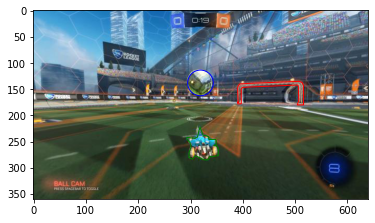

[(267, 293), (278, 298), (285, 295), (288, 290), (291, 283), (305, 282), (316, 279), (318, 284), (324, 287), (344, 292), (348, 292), (365, 289), (373, 286), (374, 279), (374, 268), (375, 251), (367, 246), (355, 241), (353, 238), (359, 236), (352, 233), (337, 233), (331, 236), (329, 241), (312, 242), (306, 223), (300, 239), (299, 246), (291, 251), (278, 252), (265, 257), (264, 262), (262, 271), (265, 274), (265, 279), (257, 285), (255, 288), (255, 292), (260, 292), (269, 294)]
('ball', 'circle', (321, 172, 9.552))


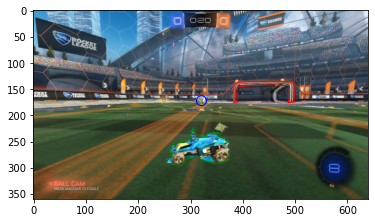

[(297, 266), (297, 252), (305, 248), (301, 245), (298, 235), (304, 231), (313, 232), (313, 228), (326, 212), (329, 230), (338, 233), (352, 237), (350, 248), (353, 254), (354, 270), (347, 272), (340, 268), (335, 276), (317, 277), (317, 268), (307, 266), (306, 272), (299, 273), (297, 264)]
('ball', 'circle', (177, 166, 6.576))


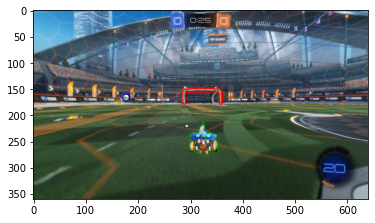

[(277, 284), (289, 282), (297, 287), (301, 298), (307, 304), (314, 304), (319, 300), (323, 290), (328, 288), (333, 280), (334, 272), (341, 263), (349, 263), (351, 270), (356, 274), (364, 274), (367, 268), (374, 262), (375, 260), (357, 252), (345, 244), (337, 242), (331, 218), (325, 240), (317, 240), (308, 242), (288, 237), (277, 243), (274, 250), (275, 255), (271, 265), (269, 272), (271, 281), (278, 285)]
('ball', 'circle', (328, 184, 7.433))


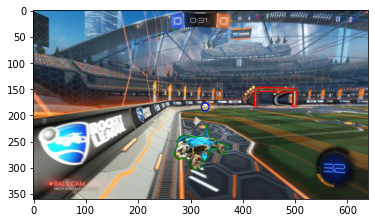

[(313, 276), (321, 269), (323, 270), (327, 279), (329, 282), (347, 292), (354, 293), (359, 285), (359, 270), (374, 270), (375, 265), (354, 259), (342, 247), (329, 239), (334, 223), (331, 223), (328, 224), (322, 232), (318, 232), (314, 234), (315, 235), (312, 236), (301, 234), (299, 232), (297, 231), (287, 230), (286, 230), (288, 235), (287, 240), (288, 245), (290, 246), (295, 247), (298, 245), (302, 247), (305, 253), (299, 256), (298, 257), (298, 258), (303, 259), (303, 263), (303, 267), (304, 272), (313, 276)]
('ball', 'circle', (322, 177, 7.696))


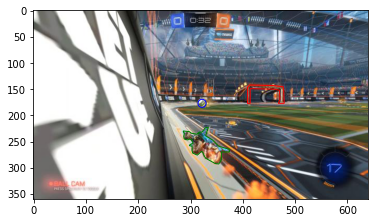

[(300, 270), (300, 254), (300, 249), (294, 238), (294, 236), (305, 233), (313, 233), (318, 212), (324, 229), (328, 230), (337, 235), (342, 236), (347, 236), (351, 231), (353, 235), (347, 247), (349, 248), (352, 254), (353, 265), (351, 272), (345, 269), (338, 269), (340, 276), (339, 277), (337, 278), (332, 271), (325, 271), (323, 279), (319, 279), (319, 271), (314, 268), (309, 268), (309, 273), (299, 270)]
('ball', 'circle', (324, 178, 15.508))


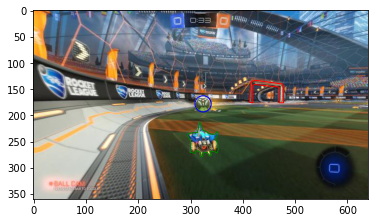

[(303, 289), (309, 283), (312, 286), (322, 291), (327, 292), (334, 290), (339, 284), (342, 285), (349, 287), (355, 287), (355, 272), (352, 261), (351, 260), (353, 256), (351, 249), (339, 247), (336, 246), (334, 242), (324, 238), (319, 221), (317, 220), (313, 240), (309, 243), (305, 249), (303, 244), (292, 244), (291, 249), (295, 263), (295, 285), (299, 290), (304, 288)]
('ball', 'circle', (321, 151, 30.504))


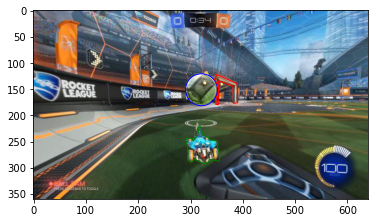

[(328, 280), (339, 268), (335, 260), (335, 257), (336, 253), (341, 248), (343, 251), (348, 252), (353, 247), (358, 247), (358, 241), (348, 236), (341, 234), (336, 234), (335, 230), (330, 230), (326, 213), (324, 214), (320, 229), (315, 229), (315, 232), (304, 235), (293, 236), (290, 230), (287, 232), (285, 240), (287, 246), (291, 248), (288, 250), (297, 268), (311, 271), (318, 269), (319, 275), (321, 278), (329, 279)]
('ball', 'circle', (319, 171, 3.727))


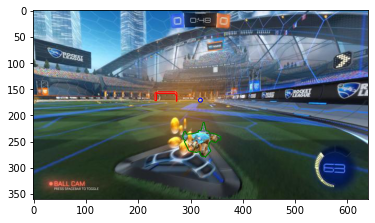

[(337, 265), (335, 245), (344, 244), (345, 238), (344, 232), (340, 231), (336, 231), (332, 229), (332, 228), (335, 226), (328, 224), (323, 209), (322, 209), (319, 225), (315, 225), (308, 229), (304, 231), (301, 237), (300, 242), (299, 244), (299, 245), (297, 242), (293, 242), (290, 243), (286, 254), (286, 260), (288, 262), (294, 262), (296, 265), (300, 268), (305, 267), (307, 261), (311, 262), (311, 267), (313, 270), (318, 264), (321, 262), (321, 257), (324, 254), (325, 265), (327, 267), (334, 268), (337, 264)]
('ball', 'circle', (318, 172, 5.426))


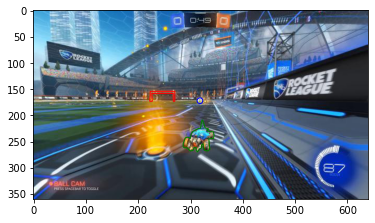

[(305, 226), (313, 223), (311, 221), (311, 217), (317, 218), (320, 206), (321, 208), (323, 218), (327, 217), (328, 222), (332, 222), (334, 222), (334, 226), (338, 226), (345, 226), (345, 229), (345, 232), (343, 232), (337, 232), (334, 236), (339, 233), (340, 235), (340, 246), (340, 250), (334, 252), (329, 256), (312, 257), (310, 251), (302, 251), (299, 251), (298, 251), (297, 241), (300, 232), (294, 232), (295, 226), (295, 224), (305, 226)]
('ball', 'circle', (323, 177, 12.351))


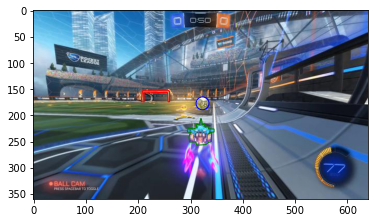

[(314, 282), (326, 281), (329, 275), (334, 276), (341, 281), (343, 281), (357, 277), (365, 267), (363, 256), (357, 248), (358, 243), (347, 236), (345, 239), (326, 234), (322, 231), (319, 228), (318, 221), (316, 216), (313, 214), (310, 229), (309, 233), (303, 233), (299, 239), (289, 240), (279, 241), (277, 246), (279, 249), (287, 254), (295, 254), (299, 254), (303, 255), (306, 258), (304, 267), (303, 272), (305, 273), (310, 272), (310, 278), (311, 280), (314, 282)]
('ball', 'circle', (319, 161, 5.706))


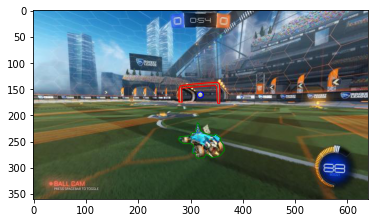

In [9]:

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt
from PIL import Image


def show_all_ball_circle(image,x,y,r,points1,points2):
    plt.imshow(image)
    circ1 = plt.Circle((x, y), r, color='blue', fill = False)
    plt.gca().add_patch(circ1)
    pol1 = plt.Polygon(points1, color='green', fill = False)
    plt.gca().add_patch(pol1)
    pol2 = plt.Polygon(points2, color = 'red', fill = False)
    plt.gca().add_patch(pol2)
    
    plt.pause(0.001)  # pause a bit so that plots are updated
    
def show_all_ball_polygon(image,points0,points1,points2):

    plt.imshow(image)
    pol0 = plt.Polygon(points0, color='blue', fill = False)
    plt.gca().add_patch(pol0)
    pol1 = plt.Polygon(points1, color='green', fill = False)
    plt.gca().add_patch(pol1)
    pol2 = plt.Polygon(points2, color = 'red', fill = False)
    plt.gca().add_patch(pol2)
    
    plt.pause(0.001)  # pause a bit so that plots are updated
    


    
    
def show_marks_on_image(filename, files_labels_dict):
    
    plt.figure()
    
    ball_index = -1
    car_index = -1
    goal_index = -1
    
    ball_type = ""
    
    for i in range(len(files_labels_dict[filename])):
        if(files_labels_dict[filename][i][0] == "ball"):
            ball_index = i
            ball_type = files_labels_dict[filename][i][1]
        if(files_labels_dict[filename][i][0] == "car"):
            car_index = i
        if(files_labels_dict[filename][i][0] == "goal"):
            goal_index = i
        
        
    xcar, ycar = None, None    
    if(car_index != -1):
        print(files_labels_dict[filename][car_index][2])
        xcar,ycar = Polygon(files_labels_dict[filename][car_index][2]).exterior.xy
        
    if(xcar == None and ycar == None):
        xcar = [0,0,1,1]
        ycar = [0,1,0,1]
    else:
        xcar = np.array(xcar)
        ycar = np.array(ycar)
        
    xgoal, ygoal = None, None    
    if(goal_index != -1):
        xgoal,ygoal = Polygon(files_labels_dict[filename][goal_index][2]).exterior.xy
        
    if(xgoal == None and ygoal == None):
        xgoal = [0,0,1,1]
        ygoal = [0,1,0,1]
    else:
        xgoal = np.array(xgoal)
        ygoal = np.array(ygoal)


    points_car = np.array([[xcar[i], ycar[i]] for i in range(len(ycar))])
    points_goal = np.array([[xgoal[i], ygoal[i]] for i in range(len(ygoal))])
    
    x,y,r = None,None,None
    
    if(ball_index == -1):
        x,y,r = 1,1,1
        show_all_ball_circle(Image.open("./allobjstestset6/"+filename).convert("RGB"),x,y,r,points_car,points_goal)
        
    elif(ball_index != -1 and ball_type == "circle"):
        print(files_labels_dict[filename][ball_index])
        x,y,r = files_labels_dict[filename][ball_index][2][0],files_labels_dict[filename][ball_index][2][1],files_labels_dict[filename][ball_index][2][2]
        show_all_ball_circle(Image.open("./allobjstestset6/"+filename).convert("RGB"),x,y,r,points_car,points_goal)
        
    else:
        xball,yball = Polygon(files_labels_dict[filename][ball_index][2]).exterior.xy
        xball = np.array(xball)
        yball = np.array(yball)
        points_ball = np.array([[xball[i], yball[i]] for i in range(len(yball))])
        show_all_ball_polygon(Image.open("./allobjstestset6/"+filename).convert("RGB"), points_ball, points_car, points_goal)
        

    plt.show()

    
for key in files_labels_dict:
    show_marks_on_image(key, files_labels_dict)

## Create the numpy segmentation masks

In [11]:
#create a numpy mask based on the annotated regions

for filename in files_labels_dict:
    
    ball_index = -1
    car_index = -1
    goal_index = -1
    
    ball_type = ""
    
    for i in range(len(files_labels_dict[filename])):
        if(files_labels_dict[filename][i][0] == "ball"):
            ball_index = i
            ball_type = files_labels_dict[filename][i][1]
        if(files_labels_dict[filename][i][0] == "car"):
            car_index = i
        if(files_labels_dict[filename][i][0] == "goal"):
            goal_index = i
        
        
    car_poly = None
    
    if(car_index != -1):
        car_poly = Polygon(files_labels_dict[filename][car_index][2])
   
    goal_poly = None
    
    if(goal_poly != -1):
        goal_poly = Polygon(files_labels_dict[filename][goal_index][2])
   
    
    xpt,ypt,rpt = None,None,None
    
    ball_poly = None
   
    if(ball_index != -1 and ball_type == "circle"):
        xpt,ypt,rpt = files_labels_dict[filename][ball_index][2][0],files_labels_dict[filename][ball_index][2][1],files_labels_dict[filename][ball_index][2][2]
    elif(ball_index != -1 and ball_type == "polyline"):
        ball_poly = Polygon(files_labels_dict[filename][ball_index][2])
        
    
    
    
    
    filename_mask = filename.replace(".jpg", ".npy")
    
    
    mask = np.zeros((360, 640)).astype("uint8")
    
    
    for y in range(360):
        for x in range(640):
            
            #if distance less or equal to radius set 1 for ball
            if( (xpt != None and ypt != None and rpt != None)):
                if(np.sqrt((xpt-x)**2+(ypt-y)**2) <= rpt):
                    mask[y][x] = int(1)
            
            #check polygons
            point = Point(x, y)
            
            if(ball_poly != None):
                if(ball_poly.contains(point)):
                    mask[y][x] = int(1)
            
            if(car_poly != None):
                if(car_poly.contains(point)):
                    mask[y][x] = int(2)

            if(goal_poly != None):
                if(goal_poly.contains(point)):
                    mask[y][x] = int(3)


    
    np.save("./allobjstestset6/npmasks/"+"mask_" +filename_mask, mask)
    
    



## Check that the masks were created properly 

In [16]:
mytestmask = np.load("./allobjstestset6/npmasks/mask_eeeframe000000001001.npy")


#read in P mode so mask palette can be used as shown in lower cell
im = Image.fromarray(mytestmask, mode = "P")


print(np.shape(im))
print(np.max(im))

(360, 640)
3


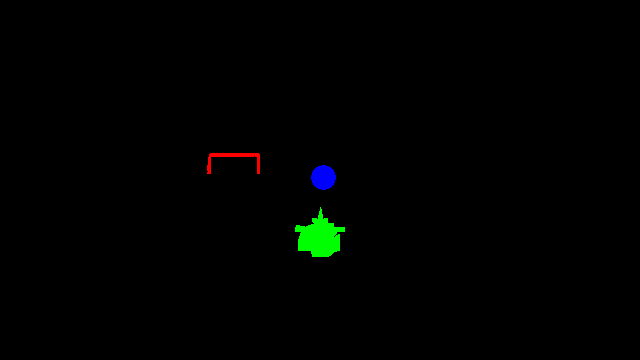

In [17]:
#show the associated palette

im.putpalette([
    0, 0, 0, # black background
    0, 0, 255, # index 1 is blue
    0, 255, 0, # index 2 is green
    255, 0, 0, # index 3 is red
    
])

im